<a href="https://colab.research.google.com/github/jiya07/Analysis-of-Amazon-Cell-Phone-Reviews-Using-NLP/blob/master/Boosting_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io 
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [90]:
from google.colab import files 
uploaded = files.upload()

Saving adult.csv to adult (2).csv


In [150]:
df = pd.read_csv(io.BytesIO(uploaded['adult.csv'])) 
print(df.head())
print(df.info())

   age workclass  fnlwgt  ... hours.per.week  native.country income
0   90         ?   77053  ...             40   United-States  <=50K
1   82   Private  132870  ...             18   United-States  <=50K
2   66         ?  186061  ...             40   United-States  <=50K
3   54   Private  140359  ...             40   United-States  <=50K
4   41   Private  264663  ...             40   United-States  <=50K

[5 rows x 15 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race           

In [152]:
#Count the occuring of the '?' in all the columns
for i in df.columns:
    t = df[i].value_counts()
    index = list(t.index)
    print ("Count of ? in", i)
    for i in index:
        temp = 0
        if i == '?':
            print (t['?'])
            temp = 1
            break
    if temp == 0:
        print ("0")

Count of ? in age
0
Count of ? in workclass
1836
Count of ? in fnlwgt
0
Count of ? in education
0
Count of ? in education.num
0
Count of ? in marital.status
0
Count of ? in occupation
1843
Count of ? in relationship
0
Count of ? in race
0
Count of ? in sex
0
Count of ? in capital.gain
0
Count of ? in capital.loss
0
Count of ? in hours.per.week
0
Count of ? in native.country
583
Count of ? in income
0


In [153]:
#Removing the rows which have "?" as workclass and native country
df=df.loc[(df['workclass'] != '?') & (df['native.country'] != '?')]
print(df.head())

   age workclass  fnlwgt  ... hours.per.week  native.country income
1   82   Private  132870  ...             18   United-States  <=50K
3   54   Private  140359  ...             40   United-States  <=50K
4   41   Private  264663  ...             40   United-States  <=50K
5   34   Private  216864  ...             45   United-States  <=50K
6   38   Private  150601  ...             40   United-States  <=50K

[5 rows x 15 columns]


In [154]:
df["income"] = [1 if i=='>50K' else 0 for i in df["income"]]
print(df.head())

   age workclass  fnlwgt  ... hours.per.week  native.country income
1   82   Private  132870  ...             18   United-States      0
3   54   Private  140359  ...             40   United-States      0
4   41   Private  264663  ...             40   United-States      0
5   34   Private  216864  ...             45   United-States      0
6   38   Private  150601  ...             40   United-States      0

[5 rows x 15 columns]


In [155]:
df_more=df.loc[df['income'] == 1]
print(df_more.head)

<bound method NDFrame.head of        age         workclass  fnlwgt  ... hours.per.week  native.country income
7       74         State-gov   88638  ...             20   United-States      1
10      45           Private  172274  ...             35   United-States      1
11      38  Self-emp-not-inc  164526  ...             45   United-States      1
12      52           Private  129177  ...             20   United-States      1
13      32           Private  136204  ...             55   United-States      1
...    ...               ...     ...  ...            ...             ...    ...
32536   54           Private  337992  ...             50           Japan      1
32539   34           Private  160216  ...             55   United-States      1
32547   39         Local-gov  111499  ...             20   United-States      1
32555   53           Private  321865  ...             40   United-States      1
32558   40           Private  154374  ...             40   United-States      1

[7508 row

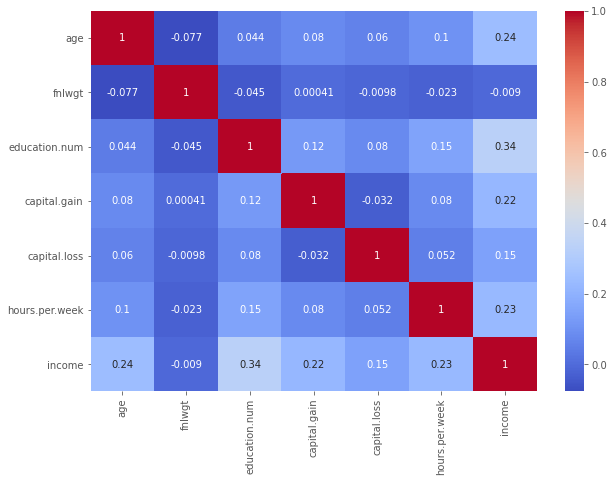

None


In [156]:
#Plot figsize
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
print(plt.show())

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


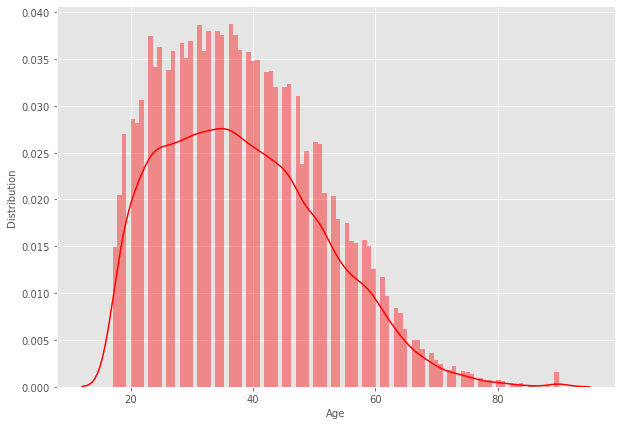

In [157]:

plt.figure(figsize=(10,7))
sns.distplot(df['age'], color="red", bins=100)
plt.ylabel("Distribution", fontsize = 10)
plt.xlabel("Age", fontsize = 10)
plt.show()

In [158]:

workclass_types = df_more['workclass'].value_counts()
labels = list(workclass_types.index) 
aggregate = list(workclass_types)
print(workclass_types)
print(aggregate)
print(labels)

Private             4876
Self-emp-not-inc     714
Local-gov            609
Self-emp-inc         600
Federal-gov          365
State-gov            344
Name: workclass, dtype: int64
[4876, 714, 609, 600, 365, 344]
['Private', 'Self-emp-not-inc', 'Local-gov', 'Self-emp-inc', 'Federal-gov', 'State-gov']


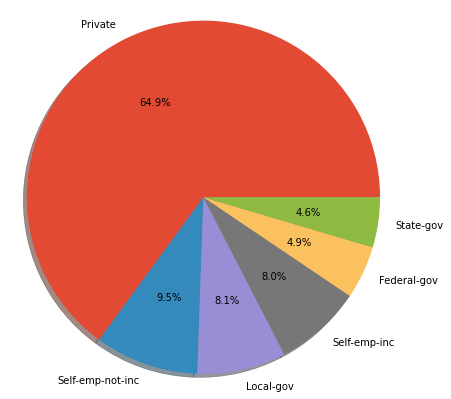

In [159]:
plt.figure(figsize=(7,7))
plt.pie(aggregate, labels=labels, autopct='%1.1f%%', shadow = True)
plt.axis('equal')
plt.show()

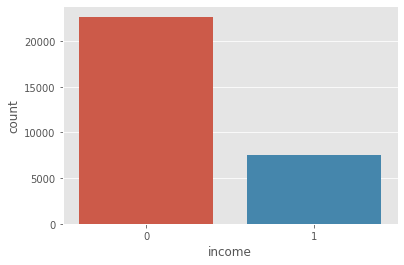

0    22661
1     7508
Name: income, dtype: int64

In [160]:
#Count plot on single categorical variable 
sns.countplot(x ='income', data = df)
plt.show() 
df['income'].value_counts()

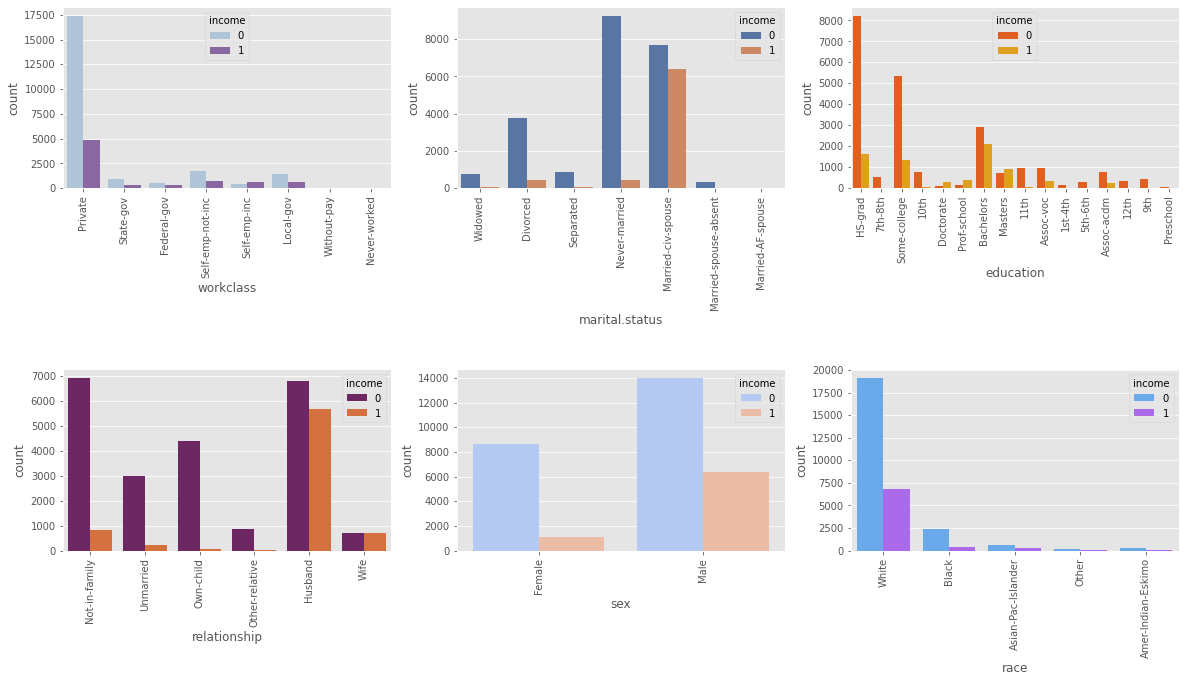

In [161]:
#To find distribution of categorical columns w.r.t income
fig, axes = plt.subplots(figsize=(20, 10))

plt.subplot(231)
sns.countplot(x ='workclass', 
              hue='income', 
              data = df,
              palette="BuPu") 
plt.xticks(rotation=90)

plt.subplot(232)
sns.countplot(x ='marital.status', 
              hue='income', 
              data = df,
              palette="deep") 
plt.xticks(rotation=90)

plt.subplot(233)
sns.countplot(x ='education', 
              hue='income', 
              data = df,
              palette = "autumn") 
plt.xticks(rotation=90)

plt.subplot(234)
sns.countplot(x ='relationship', 
              hue='income', 
              data = df,
              palette = "inferno") 
plt.xticks(rotation=90)

plt.subplot(235)
sns.countplot(x ='sex', 
              hue='income', 
              data = df,
              palette = "coolwarm") 
plt.xticks(rotation=90)

plt.subplot(236)
sns.countplot(x ='race', 
              hue='income', 
              data = df,
              palette = "cool") 
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=1) 
plt.show() 


Preprocessing the data


In [162]:
df1 = df.copy()

In [163]:
categorical_features = list(df1.select_dtypes(include=['object']).columns)
print(categorical_features)
df1

['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


In [164]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for feat in categorical_features:
    df1[feat] = le.fit_transform(df1[feat].astype(str))
df1

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,3,132870,11,9,6,4,1,4,0,0,4356,18,38,0
3,54,3,140359,5,4,0,7,4,4,0,0,3900,40,38,0
4,41,3,264663,15,10,5,10,3,4,0,0,3900,40,38,0
5,34,3,216864,11,9,0,8,4,4,0,0,3770,45,38,0
6,38,3,150601,0,6,5,1,4,4,1,0,3770,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,3,310152,15,10,4,11,1,4,1,0,0,40,38,0
32557,27,3,257302,7,12,2,13,5,4,0,0,0,38,38,0
32558,40,3,154374,11,9,2,7,0,4,1,0,0,40,38,1
32559,58,3,151910,11,9,6,1,4,4,0,0,0,40,38,0


In [165]:
X = df1.drop(columns = ['income'])
y = df1['income'].values

# Splitting the data set into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = 0)

print ("Train set size: ", X_train.shape)
print ("Test set size: ", X_test.shape)

Train set size:  (21118, 14)
Test set size:  (9051, 14)


Boosting Algorithms

In [166]:
from sklearn.ensemble import AdaBoostClassifier

# Train Adaboost Classifer
abc = AdaBoostClassifier(n_estimators = 300, learning_rate=1)
abc_model = abc.fit(X_train, y_train)

#Prediction
y_pred_abc = abc_model.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred_abc))
print("F1 score :",f1_score(y_test, y_pred_abc, average='binary'))
print("Precision : ", precision_score(y_test, y_pred_abc))

Accuracy:  0.8637719588995691
F1 score : 0.7008007765105557
Precision :  0.7921009325287987


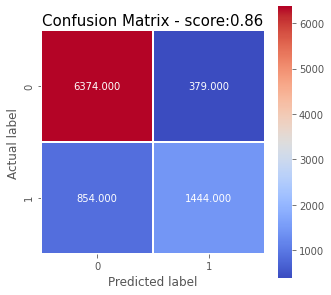

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6753
           1       0.79      0.63      0.70      2298

    accuracy                           0.86      9051
   macro avg       0.84      0.79      0.81      9051
weighted avg       0.86      0.86      0.86      9051



In [167]:
cm = confusion_matrix(y_test, y_pred_abc)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = "coolwarm");
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix - score:' + str(round(accuracy_score(y_test, y_pred_abc), 2)), size = 15);
plt.show()
print(classification_report(y_test, y_pred_abc))

In [168]:
from sklearn.ensemble import GradientBoostingClassifier 

#Training the model with gradient boosting
gbc = GradientBoostingClassifier(
    learning_rate = 0.1, 
    n_estimators = 500,
    max_depth = 5, 
    subsample = 0.9,
    min_samples_split = 100,
    max_features='sqrt', 
    random_state=10)
gbc.fit(X_train,y_train)

# Predictions
y_pred_gbc = gbc.predict(X_test)

print("Accuracy : ",accuracy_score(y_test, y_pred_gbc))
print("F1 score : ", f1_score(y_test, y_pred_gbc, average = 'binary'))
print("Precision : ", precision_score(y_test, y_pred_gbc))

Accuracy :  0.8689647552756602
F1 score :  0.7218574108818011
Precision :  0.7828077314343845


In [169]:
rms = np.sqrt(mean_squared_error(y_test, y_pred_xgboost))
print("RMSE for gradient boost: ", rms)

RMSE for gradient boost:  0.36819170404119606


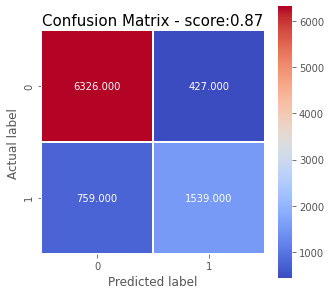

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      6753
           1       0.78      0.67      0.72      2298

    accuracy                           0.87      9051
   macro avg       0.84      0.80      0.82      9051
weighted avg       0.86      0.87      0.87      9051



In [170]:
cm = confusion_matrix(y_test, y_pred_gbc)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot = True, fmt=".3f", linewidths = 0.5, square = True, cmap = "coolwarm");
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix - score:' + str(round(accuracy_score(y_test, y_pred_gbc),2)), size = 15);
plt.show()
print(classification_report(y_test, y_pred_gbc))

In [171]:
import xgboost as xgb
from xgboost import XGBClassifier

#Training the model with gradient boosting
xgboost = XGBClassifier(learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      n_estimators=1000, 
                      max_depth=20, 
                      gamma=1)
                      
xgboost_model = xgboost.fit(X_train, y_train)

# Predictions
y_pred_xgboost = xgboost_model.predict(X_test)

print("Accuracy : ",accuracy_score(y_test, y_pred_xgboost))
print("F1 score : ", f1_score(y_test, y_pred_xgboost, average = 'binary'))
print("Precision : ", precision_score(y_test, y_pred_xgboost))

Accuracy :  0.8644348690752403
F1 score :  0.7075089392133492
Precision :  0.7822878228782287


In [172]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgboost))
print("RMSE: %f" % (rmse))

RMSE: 0.368192


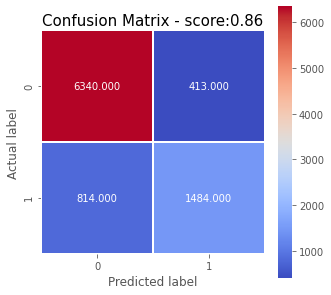

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      6753
           1       0.78      0.65      0.71      2298

    accuracy                           0.86      9051
   macro avg       0.83      0.79      0.81      9051
weighted avg       0.86      0.86      0.86      9051



In [173]:
cm = confusion_matrix(y_test, y_pred_xgboost)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = "coolwarm");
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix - score:'+str(round(accuracy_score(y_test, y_pred_xgboost),2)), size = 15);
plt.show()
print(classification_report(y_test,y_pred_xgboost))

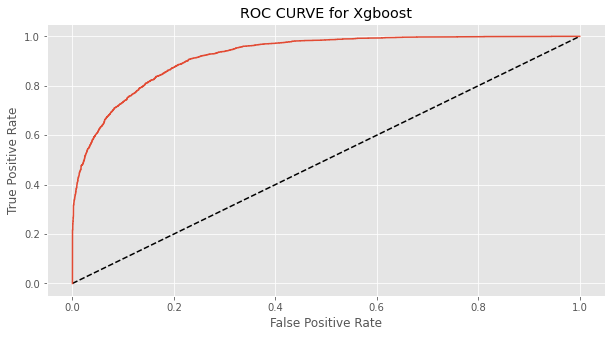

In [174]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, xgboost.predict_proba(X_test)[:,1])  
plt.figure(figsize = (10,5))
plt.plot([0,1],[0,1], 'k--')                                                 
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE for Xgboost')
plt.show()